# **Random Walker Image Segmentation Using Python (skimage)**
---

## **Overview**
This notebook demonstrates image segmentation using the Random Walker algorithm after preprocessing the image with denoising and histogram equalization techniques. The workflow involves loading an image, denoising it, enhancing its contrast, defining markers for segmentation, and finally applying the Random Walker algorithm to segment the image into distinct regions.

## **Installing PyWavelets**
- PyWavelets is installed to enable advanced wavelet transformations for image processing. Although it is not directly used in this notebook, it can be beneficial for future tasks involving wavelet-based methods.

In [33]:
# pip install PyWavelets

## **1. Importing Required Libraries**
- The necessary libraries are imported to handle image loading (`io`), denoising (`denoise_nl_means`, `estimate_sigma`), exposure adjustment (`exposure`), and segmentation (`random_walker`). `matplotlib` is used for displaying images and histograms.

In [17]:
import numpy as np
from skimage import io, img_as_float
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import exposure
from skimage.segmentation import random_walker

## **2. Loading and Displaying the Original Image**
- The image is loaded using `io.imread()` and converted to a floating-point format with `img_as_float()`, which is essential for subsequent processing. The original image is displayed in grayscale.

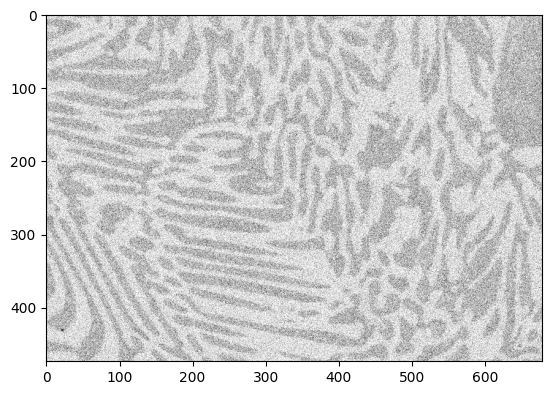

In [4]:
img = img_as_float(io.imread("/content/Alloy.jpg"))
plt.imshow(img, cmap="gray");

## **3. Plotting the Histogram of the Original Image**
- A histogram of the original image's pixel intensities is plotted. This provides insight into the distribution of pixel values, which is crucial for understanding the need for preprocessing techniques.

**Parameters & Variations**:
- `bins`: Specifies the number of bins for the histogram.
- `range=(0, 1)`: Limits the intensity values considered, suitable for floating-point images.

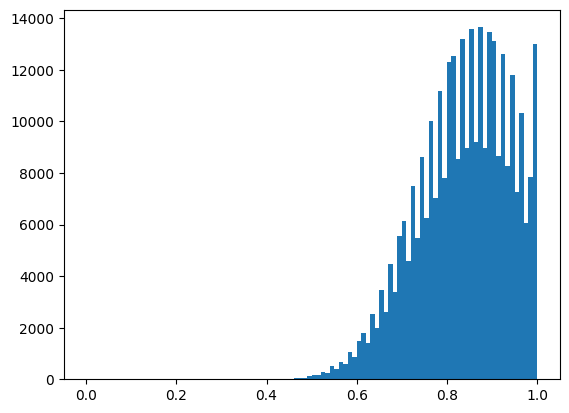

In [5]:
plt.hist(img.flat, bins=100, range=(0, 1))
plt.show();

## **4. Denoising the Image Using Non-local Means**
- The image is denoised using the Non-local Means algorithm. The noise standard deviation (`sigma_est`) is estimated and used to configure the NLM filter for effective noise reduction while preserving details. The denoised image is then displayed.

**Parameters & Variations**:
- `h=1.15 * sigma_est`: Controls the amount of noise filtering.
- `patch_size`, `patch_distance`: Define the size of the patches for comparison and the search radius for finding similar patches.

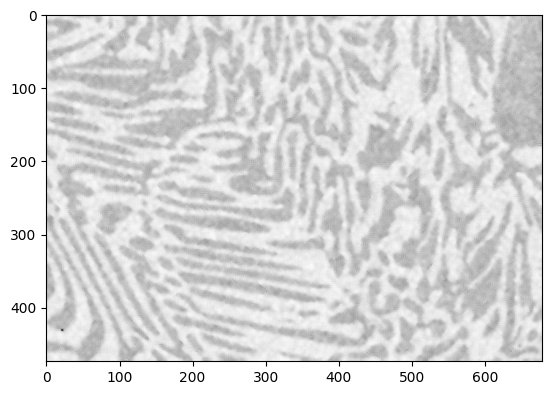

In [10]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
denoise = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, channel_axis=None)
plt.imshow(denoise, cmap="gray");

## **5. Plotting the Histogram of the Denoised Image**
- A histogram of the denoised image's pixel intensities is plotted to assess the effectiveness of the denoising process and understand the new pixel distribution.

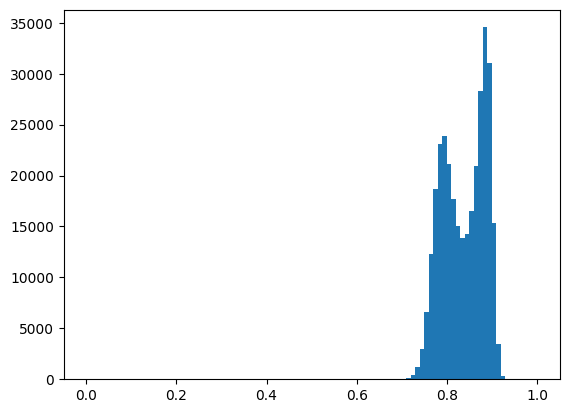

In [11]:
plt.hist(denoise.flat, bins=100, range=(0, 1))
plt.show();

## **6. Applying Adaptive Histogram Equalization**
- Adaptive Histogram Equalization (AHE) is applied to the denoised image to enhance contrast. This method improves the local contrast and brings out features that are not visible in the original image.

**Parameters & Variations**:
- AHE adjusts the histogram adaptively in small regions, improving the overall appearance of the image.

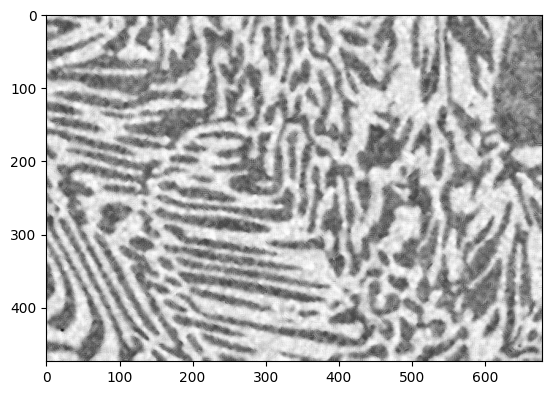

In [13]:
equalized_img = exposure.equalize_adapthist(denoise)
plt.imshow(equalized_img, cmap="gray");

## **7. Plotting the Histogram of the Equalized Image**
- The histogram of the equalized image is plotted to visualize the impact of the histogram equalization process and the resulting distribution of pixel intensities.

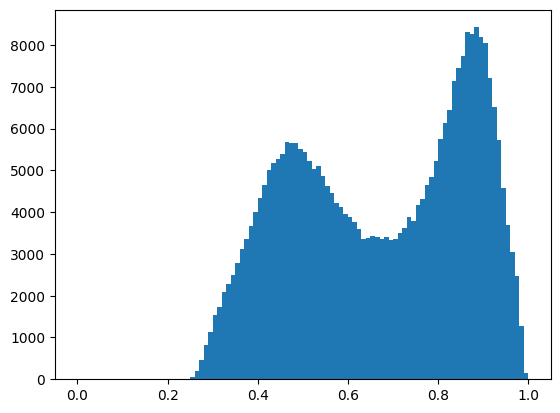

In [14]:
plt.hist(equalized_img.flat, bins=100, range=(0, 1))
plt.show();

## **8. Defining Markers for Segmentation**
- Markers are defined for the Random Walker segmentation algorithm. Two regions are marked:
  - Region 1: Pixels with intensity between 0.3 and 0.6.
  - Region 2: Pixels with intensity between 0.8 and 0.99.
- The markers are visualized to confirm their placement.

**Parameters & Variations**:
- The intensity ranges for markers can be adjusted based on the histogram analysis to accurately target the desired regions for segmentation.

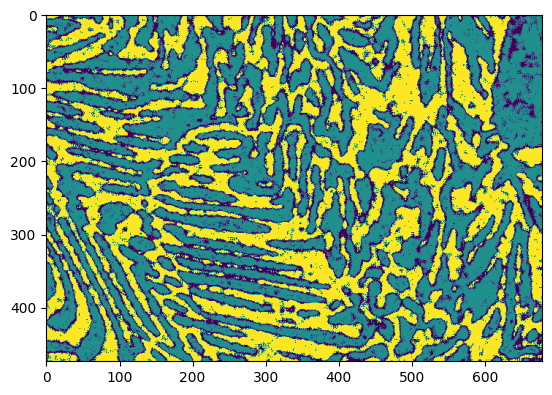

In [28]:
markers = np.zeros(img.shape, dtype=np.uint)
markers[(equalized_img > 0.3) & (equalized_img < 0.6)] = 1
markers[(equalized_img > 0.8) & (equalized_img < 0.99)] = 2
plt.imshow(markers);

## **9. Applying the Random Walker Algorithm**
- The Random Walker algorithm is applied to segment the image based on the defined markers. The result is a label image where each pixel is assigned a label corresponding to one of the markers.
- The `beta` parameter controls the smoothness of the segmentation, and the `mode` is set to "bf" (brute force).

**Parameters & Variations**:
- `beta`: Adjusting this value can enhance or reduce the effect of the smoothness constraint in the segmentation process.

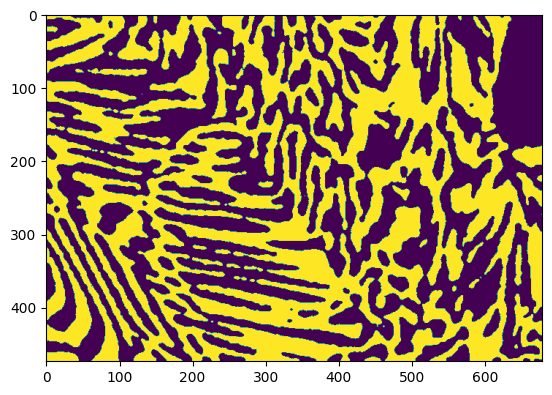

In [29]:
labels = random_walker(equalized_img, markers, beta=10, mode="bf")
plt.imshow(labels);

## **10. Visualizing the Segmented Regions**
- The segmented regions are visualized in color:
  - Red for segment1.
  - Green for segment2.
- This visualization helps to interpret the results of the Random Walker segmentation and understand the distribution of the segments within the image.

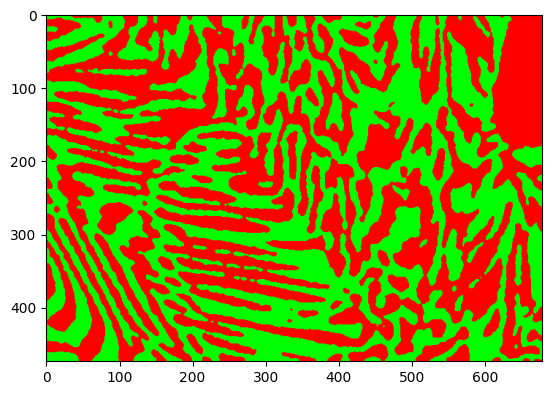

In [32]:
segment1 = (labels == 1)
segment2 = (labels == 2)

all_segments = np.zeros((equalized_img.shape[0], equalized_img.shape[1], 3))
all_segments[segment1] = (1, 0, 0)
all_segments[segment2] = (0, 1, 0)

plt.imshow(all_segments);